In [1]:
import tensorflow
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
#vgg16 imagenet kullanmak için gereklidir
imagenetModel = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3)
                  )

#imagenetModel.summary()

In [2]:
#ozellikcıkaranmodelimizde imagenet ten hazır aldığımız cnn ağımız var
#bu kısımda bizim kullanacağımız 3 tane özellik olduğundan dolayı en son 3 katmanı öğrenebilir hale getiriyoruz.
#verimiz baştan sona doğru okunuyor
#flatten--birden fazla vektör ile gelen veriyi tek boyuta indiriyor.
#dense ile kendinden sonraki tüm noktalara bağlı olduğunu söylüyoruz

#üstteki 256 256 tane nöronu temsil ediyor 
#relu - ??
#buradaki 3 bize lazım olan çıktı için.(kapalı/sol/sağ)- softmax çıktıları 0 ile 1 arasına sıkıştırıyor.


imagenetModel.trainable = True
set_trainable = False
for layer in imagenetModel.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model = tensorflow.keras.models.Sequential()
model.add(imagenetModel)
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(256,activation='relu'))
model.add(tensorflow.keras.layers.Dense(4,activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])


#compile -- loss - hata fonksiyonumuz.
#optimizer - modelim kendinini nasıl geliştirmeli. 
#metrics - performans değeri burda tutulacak
#binary_Crossentropy -- 0 ve 1 çıktılarını kontrol eder. beklenen değerden uzaklığına göre ceza puanı verir



model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21,138,243
Trainable params: 11,143,171
Non-trainable params: 9,995,072
_________________________________________________________________


c:\Users\daido\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [3]:
#bu kısım veri çoğaltma kısmıdır.

egitim_yolu = r'C:\Users\daido\Desktop\python\veriSeti\Train'
gecerleme_yolu = r'C:\Users\daido\Desktop\python\veriSeti\Validation'
test_yolu = r'C:\Users\daido\Desktop\python\veriSeti\Test'
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255, 
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      brightness_range = [0.2,1.0],
      zoom_range=0.2,
      horizontal_flip = False,
      fill_mode='nearest'
      )
train_generator = train_datagen.flow_from_directory(
        egitim_yolu,
        target_size=(224, 224),
        batch_size=16,
        )
validation_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )
validation_generator = validation_datagen.flow_from_directory(
        gecerleme_yolu,
        target_size=(224, 224),
        batch_size=16,
        )

Found 815 images belonging to 3 classes.
Found 92 images belonging to 3 classes.


In [4]:
class MyThresholdCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, acc_limit,val_limit):
        super(MyThresholdCallback, self).__init__()
        self.acc_limit = acc_limit
        self.val_limit = val_limit
    def on_epoch_end(self, epoch, logs=None): 
        acc = logs["acc"]
        val_acc = logs["val_acc"]
        if val_acc >= self.val_limit :
            if acc >= self.acc_limit :
                self.model.stop_training = True

callbacks = MyThresholdCallback(acc_limit=0.9, val_limit=0.9)




In [5]:
#model oluşturma kısmımız aşağıda eğitim yapıyoruz yaptıgımız eğitimin sonunda oluşan modeli history e atıyoruz
#history e attığımızda aşağıda bu modelimizin hata oranı vs gibi testlerini yapacağız

history = model.fit(
      train_generator,
      steps_per_epoch=15,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=1,
      callbacks=[callbacks]
      )
      

Epoch 1/50
15/15 [==============================] - 50s 3s/step - loss: 0.6460 - acc: 0.3515 - val_loss: 0.6330 - val_acc: 0.5000
Epoch 2/50
15/15 [==============================] - 48s 3s/step - loss: 0.6225 - acc: 0.4333 - val_loss: 0.6343 - val_acc: 0.5000
Epoch 3/50
15/15 [==============================] - 48s 3s/step - loss: 0.6240 - acc: 0.4100 - val_loss: 0.7430 - val_acc: 0.1875
Epoch 4/50
15/15 [==============================] - 55s 4s/step - loss: 0.6074 - acc: 0.4750 - val_loss: 0.5727 - val_acc: 0.5625
Epoch 5/50
15/15 [==============================] - 55s 4s/step - loss: 0.6011 - acc: 0.4792 - val_loss: 0.6862 - val_acc: 0.2500
Epoch 6/50
15/15 [==============================] - 51s 3s/step - loss: 0.6054 - acc: 0.4375 - val_loss: 0.6034 - val_acc: 0.5000
Epoch 7/50
15/15 [==============================] - 54s 4s/step - loss: 0.5932 - acc: 0.5208 - val_loss: 0.5778 - val_acc: 0.4375
Epoch 8/50
15/15 [==============================] - 52s 3s/step - loss: 0.5897 - acc: 0.50

In [6]:
model.save(r'C:\Users\daido\Desktop\python\TestModellerim\Model15.h5')

test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )

test_generator = test_datagen.flow_from_directory(
       test_yolu,
        target_size=(224, 224),
        batch_size=16,
        )

Found 218 images belonging to 3 classes.


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


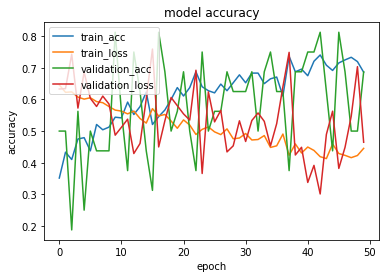

C:\Users\daido\AppData\Local\Temp\ipykernel_9044\2824435857.py:15: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.7981651425361633


In [7]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'train_loss', 'validation_acc', 'validation_loss'], loc='upper left')
plt.show()

# burada modelimizi test ediyoruz

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)